<br>
<br>

# `Maximizing Revenue For Drivers Through Payment Type(Cash or Card)`

<br>
<br>

**Problem statement:** In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Out goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the `relationship between payment type and fare` amount.

<br>

**Research Question:** Is there a relationship between total fare amount and payment type?

<br>

**Objective:** This project's main goal is to run an A/B test to examine the relationshop between the total fare and teh method of paymnet. We use Python and hypothesis testing and descrptive statistics to extract useful information that can help taxi drivers generate most cash.

<br>
<br>


# 1. Importing Libraries: 

In [93]:

import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns 
import statsmodels.api as sm 
from scipy import stats as st 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

# 2. Info About The Dataset:


[dataset_link](https://catalog.data.gov/dataset?q=yellow_tripdata)

**Possible Values/Examples:**
- 1 = Credit card.
- 2 = Cash.
- 3 = No charge (e.g., complimentary or voided trip).
- 4 = Dispute (payment contested by passenger).
- 5 = Unknown.
- 6 = Voided trip (trip canceled or invalid).

In [2]:


chunks = pd.read_csv('2020_Yellow_Taxi_Trip_Data.csv', chunksize=1000)
df = pd.concat(chunks, ignore_index=True)
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0



# 3. EDA: Exploratory Data Analysis:


In [3]:


len(df)


2621771

In [4]:

# see 75% and max: we will understand that if we have outliers or not?
df.describe()


,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge
count,2.616019e+06,2.621767e+06,2.616019e+06,2.621767e+06,2.621767e+06,2.616019e+06,2.621767e+06,2.621767e+06,2.621767e+06,2.621767e+06,2.621767e+06,2.621766e+06,2.621766e+06
mean,1.534591e+00,2.952376e+00,1.063950e+00,1.641302e+02,1.624128e+02,1.288084e+00,1.268136e+01,1.062554e+00,4.936303e-01,2.163663e+00,3.518137e-01,1.858428e+01,2.281200e+00
std,1.161294e+00,3.909447e+00,8.389513e-01,6.586611e+01,7.022222e+01,4.827244e-01,1.227138e+01,1.241947e+00,6.847054e-02,2.755196e+00,1.812916e+00,1.493952e+01,7.275675e-01
min,0.000000e+00,-2.218000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-7.000000e+00,-5.000000e-01,-4.000000e+01,-3.574000e+01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,9.800000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.115000e+01,2.500000e+00
50%,1.000000e+00,1.610000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,1.416000e+01,2.500000e+00
75%,2.000000e+00,2.990000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.956000e+01,2.500000e+00
max,9.000000e+00,2.628800e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.238000e+03,5.250000e+01,3.300000e+00,4.500000e+02,9.105000e+02,1.242300e+03,2.750000e+00


In [5]:


df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])


In [6]:

# in days: 
df["duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11


In [7]:

# convert days into minutes: 
df["duration"] = df["duration"].dt.seconds/60 


In [8]:

# take only the necessary column:
modified_df = df[["passenger_count","trip_distance","payment_type","fare_amount","duration"]]
modified_df.head(5)


,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [9]:

# check missing value: 
modified_df.isnull().sum()


passenger_count    5752
trip_distance         4
payment_type       5752
fare_amount           4
duration              4
dtype: int64

In [10]:

# check the total percentage if the number of missing value less than 2% we will remove them:
modified_df.isnull().sum()/len(modified_df)


passenger_count    0.002194
trip_distance      0.000002
payment_type       0.002194
fare_amount        0.000002
duration           0.000002
dtype: float64

In [11]:

modified_df.dropna(inplace=True)
modified_df.isnull().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration           0
dtype: int64

In [12]:

# see duplicate value: 
# according to vendor id or other columns we get unique. 
# But After removing some colums it may incrase of duplicate value
modified_df.duplicated().sum()

np.int64(1073439)

In [13]:

# in our analysis there is no contribution of duplicate values: 
modified_df.drop_duplicates(inplace=True)
modified_df.duplicated().sum()

np.int64(0)

In [14]:

len(modified_df)

1542580

In [15]:

# passenger_count and paymnet type must be integer type: 
# payment: 1=credit card, 2=cash 
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1542580 entries, 0 to 2621763
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   passenger_count  1542580 non-null  float64
 1   trip_distance    1542580 non-null  float64
 2   payment_type     1542580 non-null  float64
 3   fare_amount      1542580 non-null  float64
 4   duration         1542580 non-null  float64
dtypes: float64(5)
memory usage: 70.6 MB


In [16]:

modified_df["passenger_count"] = modified_df["passenger_count"].astype(int)
modified_df["payment_type"] = modified_df["payment_type"].astype(int)


In [17]:

modified_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1542580 entries, 0 to 2621763
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   passenger_count  1542580 non-null  int64  
 1   trip_distance    1542580 non-null  float64
 2   payment_type     1542580 non-null  int64  
 3   fare_amount      1542580 non-null  float64
 4   duration         1542580 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 70.6 MB


In [18]:

# here almost 0% is our outliers: we take only >1%:
modified_df["passenger_count"].value_counts(normalize=True)


passenger_count
1    0.599634
2    0.191018
3    0.063083
5    0.055709
4    0.034383
6    0.033996
0    0.022158
7    0.000008
8    0.000007
9    0.000003
Name: proportion, dtype: float64

In [19]:

# similary here, we remove(3,4) not include our problem statement: 
modified_df["payment_type"].value_counts(normalize=True)

payment_type
1    0.673196
2    0.314397
3    0.007823
4    0.004584
Name: proportion, dtype: float64

In [20]:

# select only payment method: 1=card, 2=cash 
modified_df[modified_df["payment_type"]<3]["payment_type"].value_counts(normalize=True)

payment_type
1    0.681654
2    0.318346
Name: proportion, dtype: float64

In [21]:

modified_df = modified_df[modified_df["payment_type"]<3]
modified_df = modified_df[(modified_df["passenger_count"]>0) & (modified_df["passenger_count"]<7)]
len(modified_df)

1490250

In [22]:
modified_df["passenger_count"].value_counts(normalize=True)

passenger_count
1    0.611622
2    0.195750
3    0.064776
5    0.057510
4    0.035224
6    0.035118
Name: proportion, dtype: float64

In [23]:

# now, replace the: 1,2 with payment type:
modified_df["payment_type"].replace(to_replace=[1,2],value=["Card","Cash"],inplace=True)
modified_df.head(3)

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.2,Card,6.0,4.800000
1,1,1.2,Card,7.0,7.416667
2,1,0.6,Card,6.0,6.183333


In [24]:

# see that: 
# trip_distance and fare_amount is negative: is not valid value so remove them 
modified_df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,1.490250e+06,1.490250e+06,1.490250e+06,1.490250e+06
mean,1.836603e+00,4.091931e+00,1.623459e+01,2.138934e+01
std,1.367504e+00,4.693627e+00,1.421356e+01,8.525115e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,0.000000e+00
25%,1.000000e+00,1.330000e+00,8.000000e+00,8.583333e+00
50%,1.000000e+00,2.370000e+00,1.150000e+01,1.385000e+01
75%,2.000000e+00,4.650000e+00,1.850000e+01,2.095000e+01
max,6.000000e+00,2.628800e+02,1.238000e+03,1.439767e+03


In [25]:

modified_df = modified_df[modified_df["trip_distance"]>0]
modified_df = modified_df[modified_df["fare_amount"]>0]

# after removing the negative values: 
modified_df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,1.475450e+06,1.475450e+06,1.475450e+06,1.475450e+06
mean,1.841116e+00,4.129246e+00,1.608730e+01,2.139913e+01
std,1.370542e+00,4.697218e+00,1.364201e+01,8.536013e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00
25%,1.000000e+00,1.360000e+00,8.000000e+00,8.650000e+00
50%,1.000000e+00,2.400000e+00,1.150000e+01,1.386667e+01
75%,2.000000e+00,4.700000e+00,1.850000e+01,2.090000e+01
max,6.000000e+00,2.628800e+02,1.238000e+03,1.439767e+03


In [26]:
modified_df["passenger_count"].value_counts()

passenger_count
1    899752
2    290018
3     95977
5     85498
6     52223
4     51982
Name: count, dtype: int64

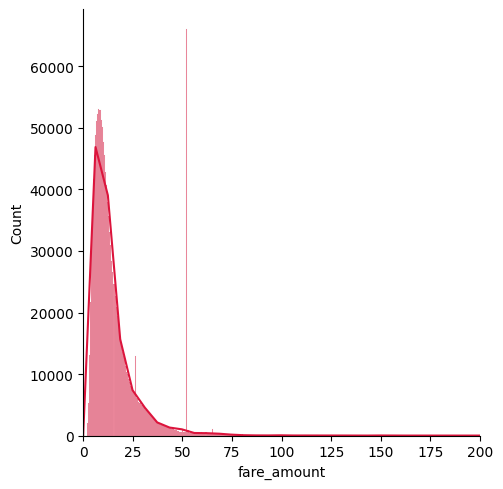

In [27]:

# now check outliers: (fare_amount):
sns.displot(data=modified_df,x="fare_amount",kind="hist",kde=True,color="crimson")
plt.xlim(0,200)
plt.show()

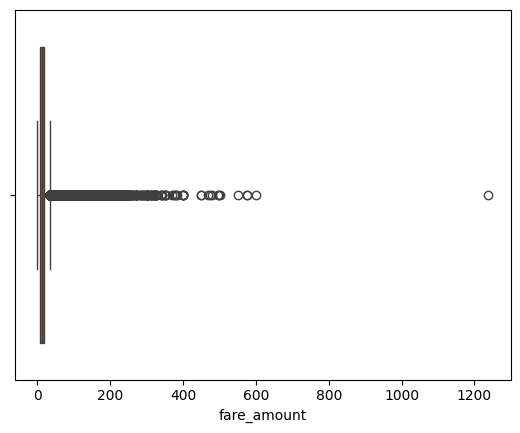

In [28]:

# clearly, we have outliers in our data and our data is not follow noraml distribution.
# as not normal distribution: we will not use z-score for removing outliers 
# rather than we use: IQR apprach: 
sns.boxplot(data=modified_df,x="fare_amount")
plt.show()

In [29]:
modified_df.columns

Index(['passenger_count', 'trip_distance', 'payment_type', 'fare_amount',
       'duration'],
      dtype='object')

In [30]:


# Remove outliers with: IQR apporach:
for col in ["passenger_count","trip_distance","fare_amount"]:
    Q1 = np.percentile(modified_df[col],25)
    Q3 = np.percentile(modified_df[col],75)
    IQR = Q3 - Q1 
    lower_fench = Q1 - 1.5*IQR 
    upper_fench = Q3 + 1.5*IQR 
    modified_df = modified_df[(modified_df[col]>lower_fench)&(modified_df[col]<upper_fench)]
modified_df.shape

(1107358, 5)

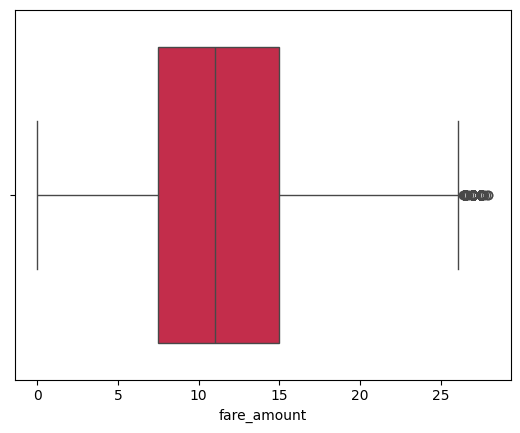

In [31]:

# it's better then previous: 
sns.boxplot(data=modified_df,x="fare_amount",color="crimson")
plt.show()

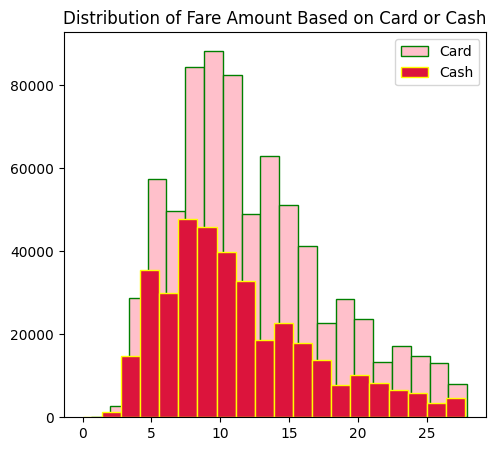

In [32]:


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of Fare Amount Based on Card or Cash")
plt.hist(modified_df[modified_df["payment_type"]=='Card']["fare_amount"],histtype="barstacked",
         bins=20,edgecolor="green",label="Card",color="pink")
plt.hist(modified_df[modified_df["payment_type"]=='Cash']["fare_amount"],histtype="barstacked",
         bins=20,edgecolor="yellow",label="Cash",color="crimson")
plt.legend()
plt.show()

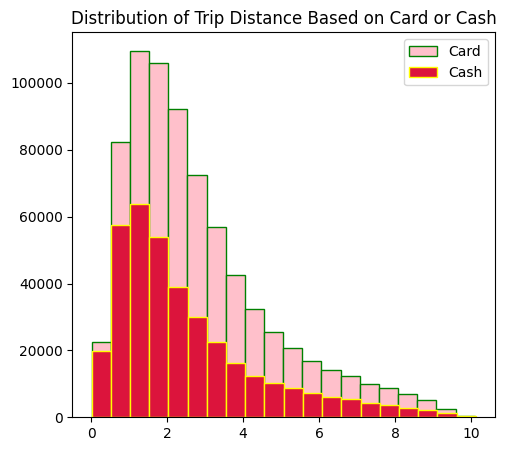

In [33]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of Trip Distance Based on Card or Cash")
plt.hist(modified_df[modified_df["payment_type"]=='Card']["trip_distance"],histtype="barstacked",
         bins=20,edgecolor="green",label="Card",color="pink")
plt.hist(modified_df[modified_df["payment_type"]=='Cash']["trip_distance"],histtype="barstacked",
         bins=20,edgecolor="yellow",label="Cash",color="crimson")
plt.legend()
plt.show()


In [34]:

# compare the two previous graph's (mean and std)
# """ 
# Base on both fare_amount and trip_distnace. Card is Prefered.
# Both mean,std is high for Card.
# """
modified_df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})


fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           12.346252  5.589697      2.799175  1.906138
Cash           11.268025  5.516810      2.502040  1.899419

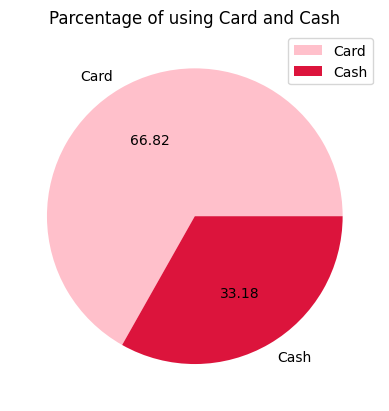

In [35]:

# from, previous, we see that card is preffed, Now we want to know the parcentange: 
plt.title("Parcentage of using Card and Cash")
plt.pie(x=modified_df["payment_type"].value_counts(normalize=True),
        labels=modified_df["payment_type"].value_counts(normalize=True).index,
        autopct="%.2f",colors=["pink","crimson"])
plt.legend()
plt.show()

In [36]:
modified_df["passenger_count"].value_counts()

passenger_count
1    766033
2    254607
3     86718
Name: count, dtype: int64

In [47]:


# Now, based on passenger count: (using stacked-bar-chart)
passenger_count = modified_df.groupby(['payment_type','passenger_count'])[["passenger_count"]].count()
passenger_count = passenger_count.rename(columns={'passenger_count':'count'}).reset_index()
passenger_count

,payment_type,passenger_count,count
0,Card,1,508532
1,Card,2,172421
2,Card,3,59014
3,Cash,1,257501
4,Cash,2,82186
5,Cash,3,27704


In [ ]:

# now, we need to show the value in percentage:
passenger_count["percentage"] = (passenger_count["count"]/passenger_count["count"].sum())*100
passenger_count


,payment_type,passenger_count,count,percentage
0,Card,1,508532,45.922999
1,Card,2,172421,15.570484
2,Card,3,59014,5.329261
3,Cash,1,257501,23.253636
4,Cash,2,82186,7.421809
5,Cash,3,27704,2.501811


In [52]:

# total must be 100%
passenger_count["percentage"].sum().item()

100.0

In [50]:

# for creting bar_chat: we need to seperately cretate dataFrame:
# 1,2,3 -> passenger_count
bar_chart_df = pd.DataFrame(columns=['payment_type',1,2,3])
bar_chart_df["payment_type"] = ['Card','Cash']
bar_chart_df

,payment_type,1,2,3
0,Card,NaN,NaN,NaN
1,Cash,NaN,NaN,NaN


In [75]:
# passenger_count.iloc[:3,3:].values

In [68]:

# Assign the first three percentages (passenger counts 1,2,3 for Card) as a 1D array
bar_chart_df.iloc[0,1:] = passenger_count.iloc[:3,3].values
bar_chart_df


,payment_type,1,2,3
0,Card,45.922999,15.570484,5.329261
1,Cash,NaN,NaN,NaN


In [72]:
passenger_count.iloc[3:,3:]

,percentage
3,23.253636
4,7.421809
5,2.501811


In [78]:

# assign cash percentages (rows 3,4,5) to the second row of bar_chart_df
bar_chart_df.iloc[1,1:] = passenger_count.iloc[3:,3].to_numpy()
bar_chart_df

,payment_type,1,2,3
0,Card,45.922999,15.570484,5.329261
1,Cash,23.253636,7.421809,2.501811


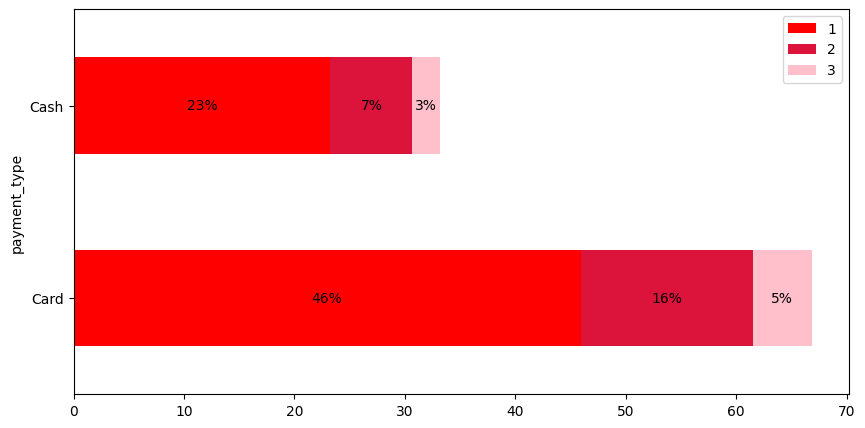

In [92]:

fig,ax = plt.subplots(figsize=(10,5))
bar_chart_df.plot(x="payment_type",kind='barh',stacked=True,color=['red','crimson','pink'],ax=ax)

# add percentage:
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y= p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')
    
plt.show()



# 3. Do the hypothesis testing: 


**Null Hypothesis:** There is no difference between customers who use credit card and who use cash.
**Alternate Hypothesis:** There is difference in fare between customers who use credit card and who use cash.

**Choosing Test:** Chi-Square is not possible cause fare amount is a continous variable. ANOVA is also not possible cause for multiple groups we do anova. Z-test is not possible cause data distribution is not normal and population std is not given(we remove many column from our dataset That's why population std. is not possible). Let's test that our data is normally distributed or not:


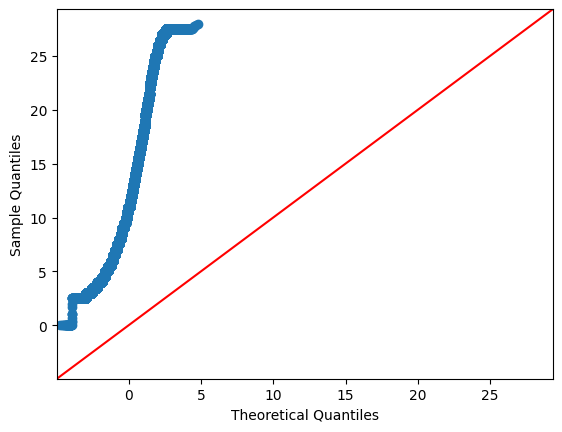

In [103]:

# not a normal distibution: 
sm.qqplot(data=modified_df["fare_amount"],line='45')
plt.show()


Then, we need to do t-tests. But we learn that t-test is for only where n<30(small sample) and if the population std is not given. 


#### 🔹 t-value formula (Welch’s t-test)

As, `equal_var=False`, **Welch t-test**

t = $\frac{\bar{x}_1 - \bar{x}_2} {\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$

Where:

* $\bar{x}_1$ = Card mean
* $\bar{x}_2$ = Cash mean
* $s_1^2$, $s_2^2$ = variance
* $n_1$, $n_2$ = sample size



In [108]:

# We need to perform independent two-sample t-test
card_sample = modified_df[modified_df["payment_type"]=="Card"]["fare_amount"]
cash_sample = modified_df[modified_df["payment_type"]=="Cash"]["fare_amount"]
t_stats,p_value = st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)

alpha = 0.05
if p_value>alpha:
    print("Null Hypothesis Accepted")
else:
    print("Null Hypothesis Rejected")
    

Null Hypothesis Rejected
